# Project Title:Health Insurance Premium Prediction

Importing Libraries

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
dtset=pd.read_csv('insurance.csv')

In [110]:
dtset.shape

(1338, 7)

In [109]:
dtset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Data Cleaning

In [111]:
dtset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [112]:
dtset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [113]:
dtset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [114]:
dtset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Data Analysis

<AxesSubplot:ylabel='age'>

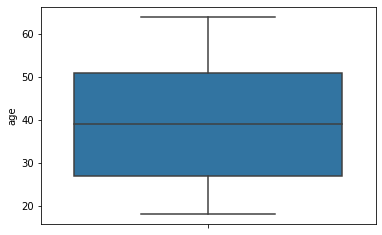

In [115]:
sns.boxplot(y='age',data=dtset)


<AxesSubplot:ylabel='bmi'>

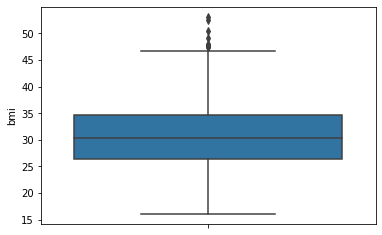

In [116]:
sns.boxplot(y='bmi',data=dtset)


<AxesSubplot:ylabel='children'>

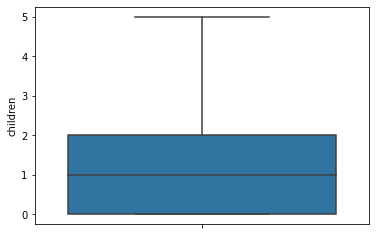

In [117]:
sns.boxplot(y='children',data=dtset)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

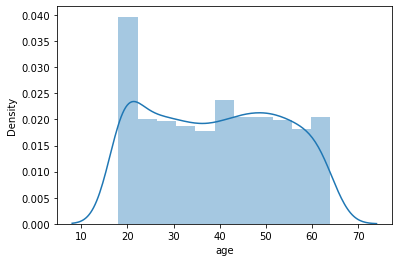

In [118]:
sns.distplot(dtset['age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

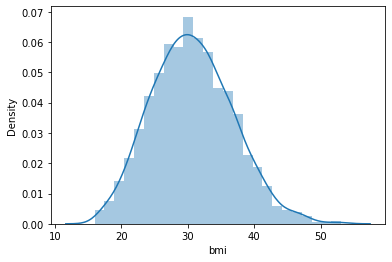

In [119]:
sns.distplot(dtset['bmi'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='children', ylabel='Density'>

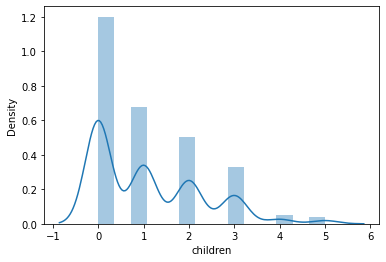

In [120]:
sns.distplot(dtset['children'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

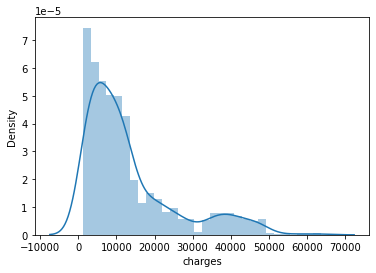

In [121]:
sns.distplot(dtset['charges'])

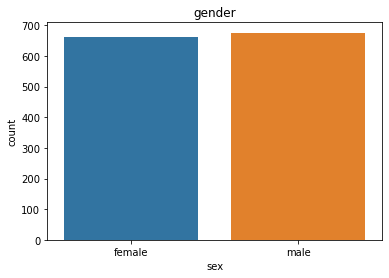

In [122]:
sns.countplot(x='sex',data=dtset)
plt.title('gender')
plt.show()

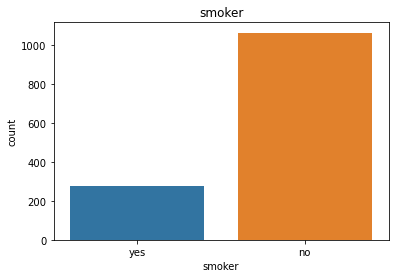

In [123]:
sns.countplot(x='smoker',data=dtset)
plt.title('smoker')
plt.show()

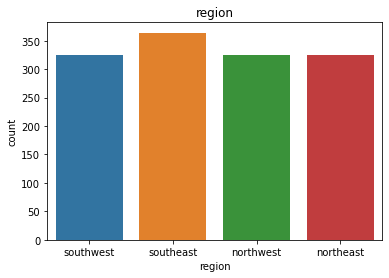

In [124]:
sns.countplot(x='region',data=dtset)
plt.title('region')
plt.show()

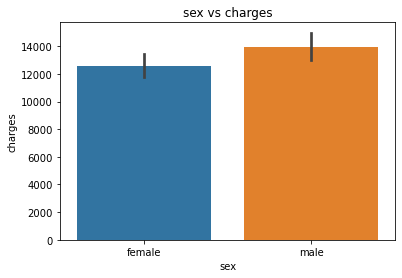

In [125]:
sns.barplot(x='sex',y='charges',data=dtset)
plt.title('sex vs charges')
plt.show()

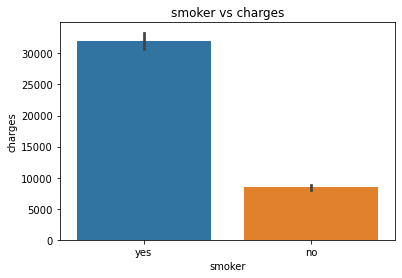

In [126]:
sns.barplot(x='smoker',y='charges',data=dtset)
plt.title('smoker vs charges')
plt.show()

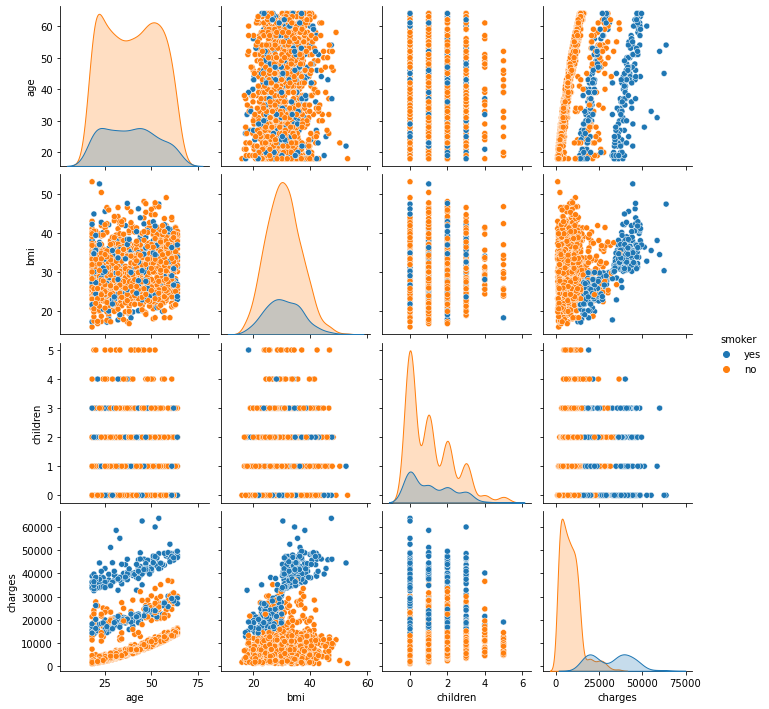

In [127]:
sns.pairplot(dtset,hue='smoker')

Data Preprocessing

In [128]:
dtset.replace({'smoker':{'no':0,'yes':1}},inplace=True)

In [129]:
dtset.replace({'sex':{'male':0,'female':1}},inplace=True)

In [130]:
dtset.replace({'region':{'southwest':1,'southeast':2,'northeast':3,'northwest':4}},inplace=True)

In [131]:
dtset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,4,21984.47061
4,32,0,28.880,0,0,4,3866.85520


In [132]:
corr=dtset.corr()

<AxesSubplot:>

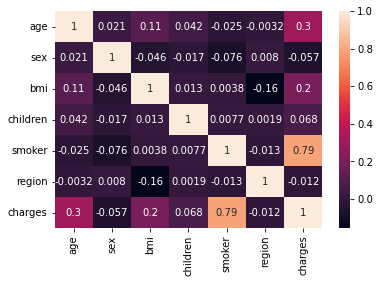

In [133]:
sns.heatmap(corr, annot = True)


Building Model

In [134]:
x=dtset.drop(['charges'],axis=1)
y=dtset['charges']

In [135]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,4
4,32,0,28.880,0,0,4
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,4
1334,18,1,31.920,0,0,3
1335,18,1,36.850,0,0,2
1336,21,1,25.800,0,0,1


In [136]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [137]:
from sklearn.model_selection import train_test_split

In [138]:
x_train, x_test,y_train,y_test = train_test_split(x, y,test_size=0.2,random_state=2)

In [139]:
x.shape

(1338, 6)

In [140]:
x_train.shape


(1070, 6)

In [141]:
x_test.shape


(268, 6)

In [142]:
y_train.shape


(1070,)

In [143]:
y_test.shape

(268,)

In [144]:
from sklearn.linear_model import LinearRegression


In [145]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [146]:
predictions = lr.predict(x_test)

In [147]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [148]:
mse=mean_squared_error(y_test,predictions)
np.sqrt(mse)

6199.25545970555

In [149]:
mae=mean_absolute_error(y_test,predictions)
mae

4287.000383987176

In [150]:
r2_score(y_test, predictions)

0.7441032539760071

Text(0, 0.5, 'Predicted Y')

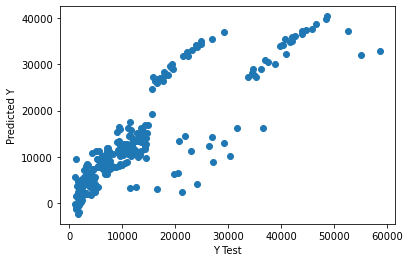

In [151]:
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [152]:
from sklearn.ensemble import RandomForestRegressor


In [153]:
Rr=RandomForestRegressor()
Rr.fit(x_train,y_train)

RandomForestRegressor()

In [154]:
prediction = Rr.predict(x_test)

In [155]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [156]:
mse=mean_squared_error(y_test,prediction)
np.sqrt(mse)

4954.69444467886

In [157]:
mae=mean_absolute_error(y_test,prediction)
mae

2776.4285991264555

In [158]:
r2_score(y_test, prediction)

0.8365370054772243

Text(0, 0.5, 'Predicted Y')

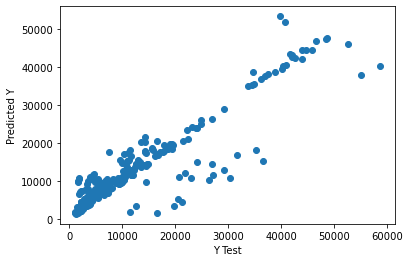

In [159]:
import matplotlib.pyplot as plt
plt.scatter(y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')